<a href="https://colab.research.google.com/github/yadu7701/supervisedlearning/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.17
R-Squared: 0.26
Enter value for Pregnancies: 6
Enter value for Glucose: 148
Enter value for BloodPressure: 72
Enter value for SkinThickness: 35
Enter value for Insulin: 0
Enter value for BMI: 33.6
Enter value for DiabetesPedigreeFunction: 0.67
Enter value for Age: 50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Outcome: 0.7050635286548819


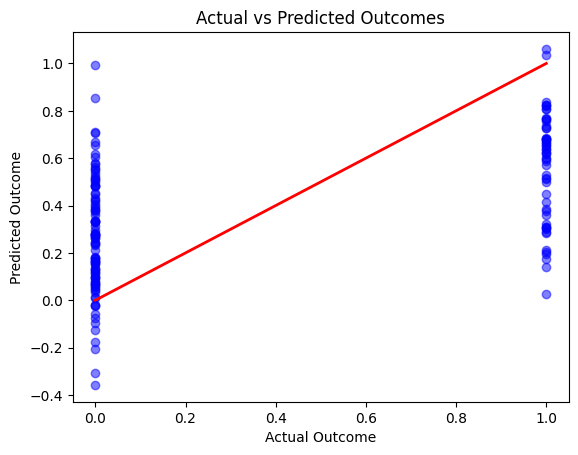

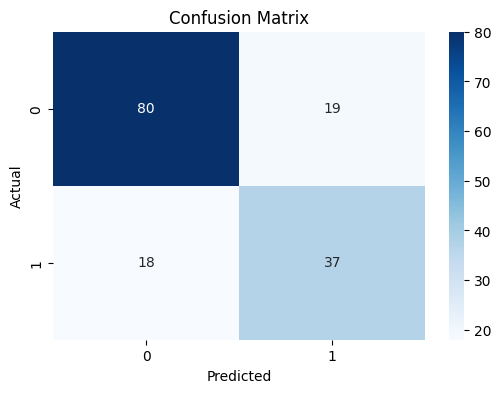

Accuracy: 0.76


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'path_to_your_dataset.csv' with your actual file path)
data = pd.read_csv('/content/diabetes.csv')

# Prepare the data (standardize features if necessary)
X = data.drop(columns=['Outcome'])  # Exclude the target column
y = data['Outcome']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-Squared: {r2:.2f}')

# Function to make predictions
def predict_diabetes(features):
    new_sample = np.array(features).reshape(1, -1)
    new_sample_scaled = scaler.transform(new_sample)
    prediction = model.predict(new_sample_scaled)
    return prediction[0]

# Example of getting input from the user
input_values = []
for feature in X.columns:
    value = float(input(f"Enter value for {feature}: "))
    input_values.append(value)

# Make prediction
outcome = predict_diabetes(input_values)
print(f'Predicted Outcome: {outcome}')

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Actual vs Predicted Outcomes')
plt.show()

# Confusion Matrix (convert predicted regression values to binary outcomes)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')
